Dataset Link :
https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

<h1>Library Import

In [27]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

<h1>Data View

In [28]:
#import dataset
Url="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df=pd.read_csv(Url)

In [29]:
df.head(n=10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
print("Data Duplicated :")
print(df.duplicated().value_counts())

Data Duplicated :
False    1337
True        1
dtype: int64


In [32]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [33]:
#drop duplicate
print("Data awal :", df.shape)
df.drop_duplicates(inplace=True)
print("Data akhir :", df.shape)

Data awal : (1338, 7)
Data akhir : (1337, 7)


In [34]:
df['sex'] = df['sex'].map({'female':1, 'male':0})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})
df['region'] = df['region'].map({'northwest':0, 'northeast':1, 'southwest':2, 'southeast':3})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,3,1725.55230
2,28,0,33.000,3,0,3,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


<h3>Mapping

In [35]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,1.545251,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.130521,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,3.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<h1>Univariate data

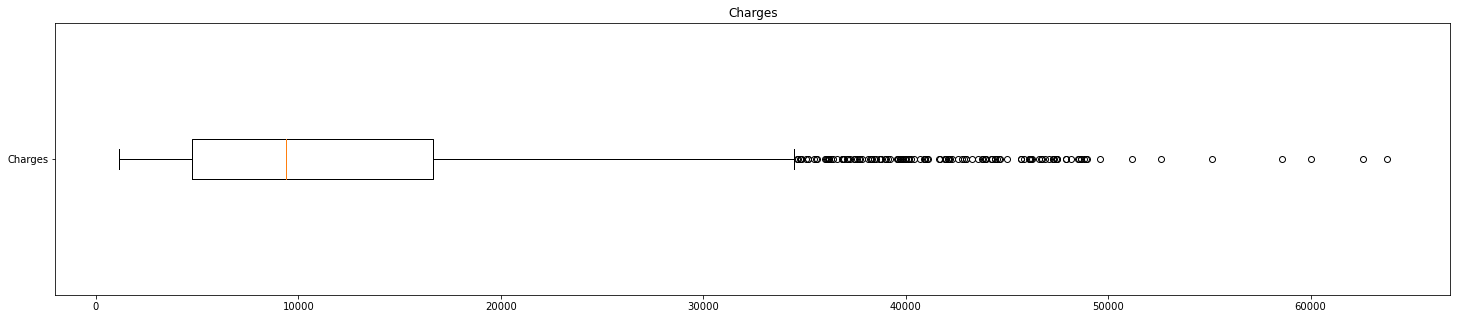

In [53]:
#Charges
plt.figure(figsize=(25,5))
plt.title('Charges')
plt.boxplot(df['charges'], labels=["Charges"], vert=False)
plt.show()

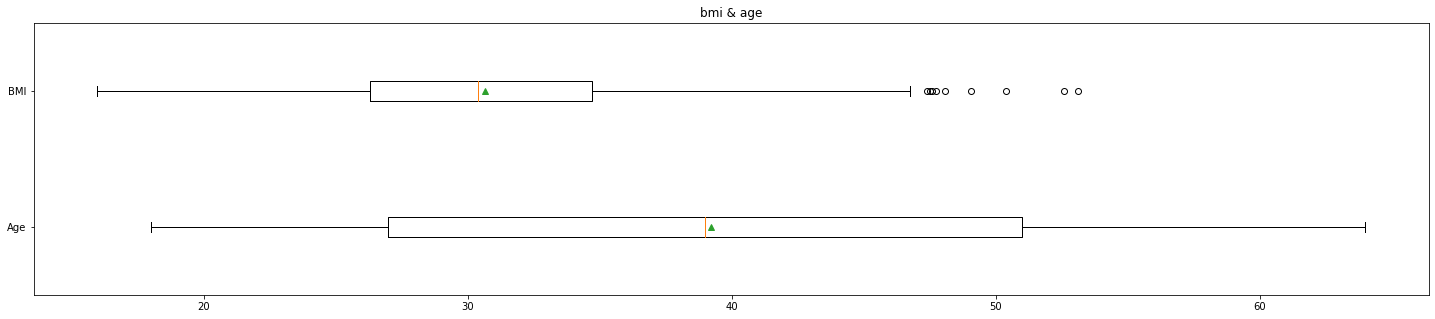

In [37]:
#bmi
plt.figure(figsize=(25,5))
plt.title('bmi & age')
plt.boxplot(df[['age','bmi']], labels=["Age","BMI"], showmeans=True, vert=False)
plt.show()
#Age
# plt.figure(figsize=(25,5))
# plt.title('Age')
# plt.boxplot(df['age'], vert=False)
# plt.show()

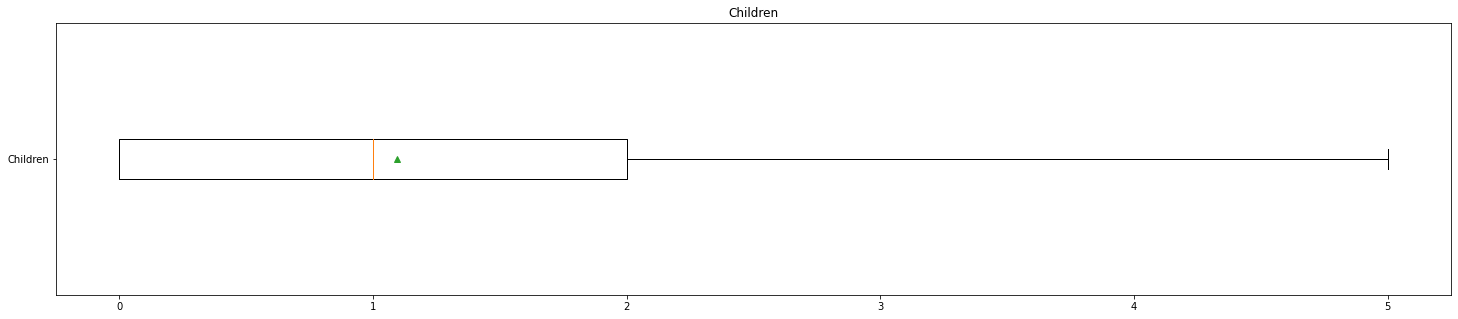

In [38]:
#children
plt.figure(figsize=(25,5))
plt.title('Children')
plt.boxplot(df['children'], labels=["Children"],showmeans=True, vert=False)
plt.show()

<h1>Multivariate data</h1>

<AxesSubplot:>

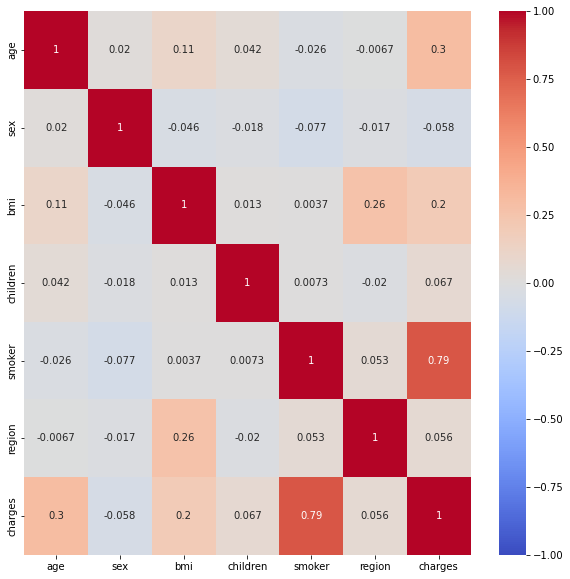

In [39]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1,vmax=1)

<h1>Predict

In [40]:
reg = linear_model.LinearRegression()
reg.fit(df[['age', 'sex', 'bmi','region']], df['charges'])

LinearRegression()

In [41]:

print("coef :", reg.coef_)
print("intercept :", reg.intercept_)

coef : [  243.07969592 -1353.52762089   319.82643242   158.39842571]
intercept : -5636.548341721793


In [42]:
print("Predict", reg.predict([[20,1,1,3]]))

Predict [-1333.46033458]


<h1>Train Test

In [43]:
# Independent Variabel
X = df[['age', 'sex','bmi','children', 'smoker', 'region']]

# Dependent Variabel
y = df['charges']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [45]:
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = classifier.predict(X_test)
comparison = pd.DataFrame({"Actual" : y_test, "Prediction" : y_pred})
comparison.head(15)

,Actual,Prediction
1248,1633.96180,4860.558490
610,8547.69130,9231.211774
393,9290.13950,10929.129776
503,32548.34050,26191.691055
198,9644.25250,7118.256770
821,2680.94930,929.148398
31,2198.18985,1294.022929
1251,1241.56500,-694.134214
1299,2710.82855,2119.703640
1151,12235.83920,14465.204329


In [47]:
import statsmodels.api as sm
x = sm.add_constant(X)
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     666.0
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:35:38   Log-Likelihood:                -13539.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1330   BIC:                         2.713e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.214e+04    963.895    -12.591      0.0

c:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [48]:
print('Charges Predict :', classifier.predict([[30,1,30,1,0,2]]))

Charges Predict : [5547.95626673]


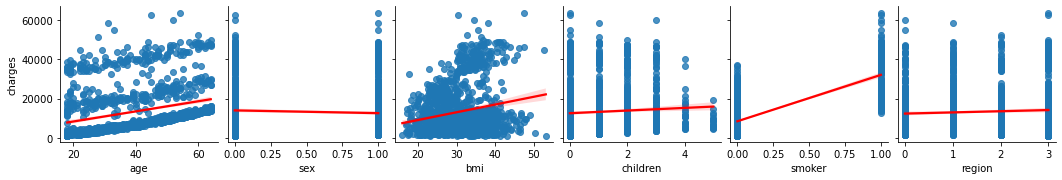

In [49]:
sns.pairplot(df,x_vars=['age','sex','bmi','children','smoker','region'],y_vars=['charges'],kind='reg',plot_kws={'line_kws':{'color':'red'}})
plt.show()